In [1]:
import atoti as tt

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Welcome to Atoti 0.8.9!

By using this community edition, you agree with the license available at https://docs.atoti.io/latest/eula.html.
Browse the official documentation at https://docs.atoti.io.
Join the community at https://www.atoti.io/register.

Atoti collects telemetry data, which is used to help understand how to improve the product.
If you don't wish to send usage data, you can request a trial license at https://www.atoti.io/evaluation-license-request.

You can hide this message by setting the `ATOTI_HIDE_EULA_MESSAGE` environment variable to True.


In [2]:
session = tt.Session()

In [3]:
transaction_table = session.read_csv("data/FoodMart/FoodMart-Transactions.csv")

In [4]:
transaction_table.head()

,transaction_date,stock_date,product_id,customer_id,store_id,quantity
0,1/11/1997,1/10/1997,1517,3802,6,4
1,1/11/1997,1/10/1997,375,3802,6,3
2,1/16/1997,1/9/1997,1192,9224,17,4
3,1/1/1997,12/30/1996,952,3449,6,4
4,1/1/1997,12/30/1996,517,7859,6,4


In [5]:
cube = session.create_cube(transaction_table)

In [6]:
l, m = cube.levels, cube.measures

In [7]:
l

In [8]:
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001CDFFCC2F10>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x000001CDFFCCD8E0>, 'product_id.SUM': <atoti.measure.Measure object at 0x000001CDFFCCD850>, 'product_id.MEAN': <atoti.measure.Measure object at 0x000001CDFFCCD940>, 'customer_id.SUM': <atoti.measure.Measure object at 0x000001CDFFCCD8B0>, 'customer_id.MEAN': <atoti.measure.Measure object at 0x000001CDFFCCD9A0>, 'store_id.SUM': <atoti.measure.Measure object at 0x000001CDFFCCD910>, 'store_id.MEAN': <atoti.measure.Measure object at 0x000001CDFFCCDA00>, 'quantity.SUM': <atoti.measure.Measure object at 0x000001CDFFCCD970>, 'quantity.MEAN': <atoti.measure.Measure object at 0x000001CDFFCCDA60>}

In [9]:
m["stock_date.isnull"] = l["stock_date"].isnull()

In [10]:
cube.query(
    m["stock_date.isnull"],
    levels=[l["stock_date"]],
    include_totals=True,
)

,stock_date.isnull
stock_date,
Total,True
1/1/1997,False
1/10/1997,False
1/11/1997,False
1/12/1997,False
...,...
9/5/1997,False
9/6/1997,False
9/7/1997,False


In [11]:
session.tables.schema

```mermaid
erDiagram
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
```


In [12]:
customer_table = session.read_csv("data/FoodMart/Customer-Lookup.csv", keys=["customer_id"])

In [13]:
customer_table.head()

,customer_acct_num,first_name,last_name,customer_address,customer_city,customer_state_province,customer_postal_code,customer_country,birthdate,marital_status,yearly_income,gender,total_children,num_children_at_home,education,acct_open_date,member_card,occupation,homeowner
customer_id,,,,,,,,,,,,,,,,,,,
1289,12001609206,Sharon,Campers,1242 Frayne Lane,Yakima,WA,24309,USA,10/11/1959,M,$30K - $50K,M,4,4,High School Degree,10/22/1994,Golden,Manual,Y
434,92537268400,Glenn,Trach,6022 La Salle Ct.,Oak Bay,BC,30329,Canada,5/5/1919,M,$70K - $90K,F,3,2,Bachelors Degree,3/8/1994,Golden,Management,N
1296,12033329010,Lutgardis,Harp,9491 Toyon Dr,Kirkland,WA,72951,USA,1/11/1930,S,$70K - $90K,F,1,0,Partial High School,11/25/1994,Bronze,Professional,Y
7,87521172800,Rebecca,Kanagaki,2860 D Mt. Hood Circle,Tlaxiaco,Oaxaca,13343,Mexico,3/27/1949,M,$30K - $50K,F,2,1,Partial High School,5/1/1991,Bronze,Manual,Y
11,87572821378,Jonathan,Murraiin,5423 Camby Rd.,La Mesa,CA,35890,USA,6/20/1967,S,$50K - $70K,M,4,0,High School Degree,4/23/1992,Bronze,Manual,N


In [14]:
transaction_table.join(customer_table, transaction_table["customer_id"] == customer_table["customer_id"])

In [15]:
session.tables.schema

```mermaid
erDiagram
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Customer-lookup" {
    _ int PK "customer_id"
    nullable long "customer_acct_num"
    _ String "first_name"
    _ String "last_name"
    _ String "customer_address"
    _ String "customer_city"
    _ String "customer_state_province"
    nullable int "customer_postal_code"
    _ String "customer_country"
    _ String "birthdate"
    _ String "marital_status"
    _ String "yearly_income"
    _ String "gender"
    nullable int "total_children"
    nullable int "num_children_at_home"
    _ String "education"
    _ String "acct_open_date"
    _ String "member_card"
    _ String "occupation"
    _ String "homeowner"
  }
  "Foodmart-transactions" }o--o| "Customer-lookup" : "`customer_id` == `customer_id`"
```


In [16]:
product_table = session.read_csv("data/FoodMart/Product-Lookup.csv", keys=["product_id"])

In [17]:
product_table.head()

,product_brand,product_name,product_sku,product_retail_price,product_cost,product_weight
product_id,,,,,,
2,Washington,Washington Mango Drink,96516502499,0.74,0.26,7.42
6,Washington,Washington Cola,29804642796,1.15,0.37,15.8
10,Washington,Washington Apple Juice,22114084362,1.42,0.5,8.13
14,Jeffers,Jeffers Wheat Puffs,92942813038,1.93,0.71,21.6
18,Blue Label,Blue Label Canned String Beans,85252254605,2.67,1.17,12.6


In [18]:
transaction_table.join(product_table, transaction_table["product_id"] == product_table["product_id"])

In [19]:
session.tables.schema

```mermaid
erDiagram
  "Product-lookup" {
    _ int PK "product_id"
    _ String "product_brand"
    _ String "product_name"
    nullable long "product_sku"
    nullable double "product_retail_price"
    nullable double "product_cost"
    nullable double "product_weight"
  }
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Customer-lookup" {
    _ int PK "customer_id"
    nullable long "customer_acct_num"
    _ String "first_name"
    _ String "last_name"
    _ String "customer_address"
    _ String "customer_city"
    _ String "customer_state_province"
    nullable int "customer_postal_code"
    _ String "customer_country"
    _ String "birthdate"
    _ String "marital_status"
    _ String "yearly_income"
    _ String "gender"
    nullable int "total_children"
    nullable int "num_children_at_home"
    _ String "education"
    _ String "acct_open_date"
    _ String "member_card"
    _ String "occupation"
    _ String "homeowner"
  }
  "Foodmart-transactions" }o--o| "Customer-lookup" : "`customer_id` == `customer_id`"
  "Foodmart-transactions" }o--o| "Product-lookup" : "`product_id` == `product_id`"
```


In [20]:
store_table = session.read_csv("data/FoodMart/Store-Lookup.csv", keys=["store_id"])

In [21]:
store_table.head()

,region_id,store_type,store_name,store_street_address,store_city,store_state,store_country,store_phone,first_opened_date,last_remodel_date,total_sqft,grocery_sqft
store_id,,,,,,,,,,,,
7,3,Supermarket,Store 7,1077 Wharf Drive,Los Angeles,CA,USA,477-555-7967,5/21/1971,10/20/1981,23598,14210
15,18,Supermarket,Store 15,5006 Highland Drive,Seattle,WA,USA,893-555-1024,7/24/1969,10/19/1973,21215,13305
23,89,Mid-Size Grocery,Store 23,3920 Noah Court,Yakima,WA,USA,170-555-8424,7/16/1977,7/24/1987,29182,19283
8,26,Deluxe Supermarket,Store 8,3173 Buena Vista Ave,Merida,Yucatan,Mexico,797-555-3417,9/23/1958,11/18/1967,30797,20141
16,87,Supermarket,Store 16,5922 La Salle Ct,Spokane,WA,USA,643-555-3645,8/23/1974,7/13/1977,30268,22063


In [22]:
transaction_table.join(store_table, transaction_table["store_id"] == store_table["store_id"])

In [23]:
session.tables.schema

```mermaid
erDiagram
  "Product-lookup" {
    _ int PK "product_id"
    _ String "product_brand"
    _ String "product_name"
    nullable long "product_sku"
    nullable double "product_retail_price"
    nullable double "product_cost"
    nullable double "product_weight"
  }
  "Store-lookup" {
    _ int PK "store_id"
    nullable int "region_id"
    _ String "store_type"
    _ String "store_name"
    _ String "store_street_address"
    _ String "store_city"
    _ String "store_state"
    _ String "store_country"
    _ String "store_phone"
    _ String "first_opened_date"
    _ String "last_remodel_date"
    nullable int "total_sqft"
    nullable int "grocery_sqft"
  }
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Customer-lookup" {
    _ int PK "customer_id"
    nullable long "customer_acct_num"
    _ String "first_name"
    _ String "last_name"
    _ String "customer_address"
    _ String "customer_city"
    _ String "customer_state_province"
    nullable int "customer_postal_code"
    _ String "customer_country"
    _ String "birthdate"
    _ String "marital_status"
    _ String "yearly_income"
    _ String "gender"
    nullable int "total_children"
    nullable int "num_children_at_home"
    _ String "education"
    _ String "acct_open_date"
    _ String "member_card"
    _ String "occupation"
    _ String "homeowner"
  }
  "Foodmart-transactions" }o--o| "Store-lookup" : "`store_id` == `store_id`"
  "Foodmart-transactions" }o--o| "Customer-lookup" : "`customer_id` == `customer_id`"
  "Foodmart-transactions" }o--o| "Product-lookup" : "`product_id` == `product_id`"
```


In [24]:
region_table = session.read_csv("data/FoodMart/Region-Lookup.csv", keys=["region_id"])

In [25]:
store_table.join(region_table, store_table["region_id"] == region_table["region_id"])

In [26]:
session.tables.schema

```mermaid
erDiagram
  "Product-lookup" {
    _ int PK "product_id"
    _ String "product_brand"
    _ String "product_name"
    nullable long "product_sku"
    nullable double "product_retail_price"
    nullable double "product_cost"
    nullable double "product_weight"
  }
  "Region-lookup" {
    _ int PK "region_id"
    _ String "sales_district"
    _ String "sales_region"
  }
  "Store-lookup" {
    _ int PK "store_id"
    nullable int "region_id"
    _ String "store_type"
    _ String "store_name"
    _ String "store_street_address"
    _ String "store_city"
    _ String "store_state"
    _ String "store_country"
    _ String "store_phone"
    _ String "first_opened_date"
    _ String "last_remodel_date"
    nullable int "total_sqft"
    nullable int "grocery_sqft"
  }
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Customer-lookup" {
    _ int PK "customer_id"
    nullable long "customer_acct_num"
    _ String "first_name"
    _ String "last_name"
    _ String "customer_address"
    _ String "customer_city"
    _ String "customer_state_province"
    nullable int "customer_postal_code"
    _ String "customer_country"
    _ String "birthdate"
    _ String "marital_status"
    _ String "yearly_income"
    _ String "gender"
    nullable int "total_children"
    nullable int "num_children_at_home"
    _ String "education"
    _ String "acct_open_date"
    _ String "member_card"
    _ String "occupation"
    _ String "homeowner"
  }
  "Store-lookup" }o--o| "Region-lookup" : "`region_id` == `region_id`"
  "Foodmart-transactions" }o--o| "Product-lookup" : "`product_id` == `product_id`"
  "Foodmart-transactions" }o--o| "Store-lookup" : "`store_id` == `store_id`"
  "Foodmart-transactions" }o--o| "Customer-lookup" : "`customer_id` == `customer_id`"
```


In [27]:
calendar_table = session.read_csv("data/FoodMart/Calendar-Lookup.csv", keys=["date"])

In [28]:
transaction_table.join(calendar_table, transaction_table["stock_date"] == calendar_table["date"])

In [29]:
# transaction_table.join(calendar_table, transaction_table["transaction_date"] == calendar_table["date"])

In [30]:
session.tables.schema

```mermaid
erDiagram
  "Product-lookup" {
    _ int PK "product_id"
    _ String "product_brand"
    _ String "product_name"
    nullable long "product_sku"
    nullable double "product_retail_price"
    nullable double "product_cost"
    nullable double "product_weight"
  }
  "Region-lookup" {
    _ int PK "region_id"
    _ String "sales_district"
    _ String "sales_region"
  }
  "Store-lookup" {
    _ int PK "store_id"
    nullable int "region_id"
    _ String "store_type"
    _ String "store_name"
    _ String "store_street_address"
    _ String "store_city"
    _ String "store_state"
    _ String "store_country"
    _ String "store_phone"
    _ String "first_opened_date"
    _ String "last_remodel_date"
    nullable int "total_sqft"
    nullable int "grocery_sqft"
  }
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Customer-lookup" {
    _ int PK "customer_id"
    nullable long "customer_acct_num"
    _ String "first_name"
    _ String "last_name"
    _ String "customer_address"
    _ String "customer_city"
    _ String "customer_state_province"
    nullable int "customer_postal_code"
    _ String "customer_country"
    _ String "birthdate"
    _ String "marital_status"
    _ String "yearly_income"
    _ String "gender"
    nullable int "total_children"
    nullable int "num_children_at_home"
    _ String "education"
    _ String "acct_open_date"
    _ String "member_card"
    _ String "occupation"
    _ String "homeowner"
  }
  "Calendar-lookup" {
    _ String PK "date"
  }
  "Store-lookup" }o--o| "Region-lookup" : "`region_id` == `region_id`"
  "Foodmart-transactions" }o--o| "Product-lookup" : "`product_id` == `product_id`"
  "Foodmart-transactions" }o--o| "Calendar-lookup" : "`stock_date` == `date`"
  "Foodmart-transactions" }o--o| "Store-lookup" : "`store_id` == `store_id`"
  "Foodmart-transactions" }o--o| "Customer-lookup" : "`customer_id` == `customer_id`"
```


In [31]:
returns_table = session.read_csv("data/FoodMart/FoodMart-Returns-1997-1998.csv")

In [32]:
calendar_table.join(returns_table, calendar_table["date"] == returns_table["return_date"])

In [33]:
session.tables.schema

```mermaid
erDiagram
  "Product-lookup" {
    _ int PK "product_id"
    _ String "product_brand"
    _ String "product_name"
    nullable long "product_sku"
    nullable double "product_retail_price"
    nullable double "product_cost"
    nullable double "product_weight"
  }
  "Region-lookup" {
    _ int PK "region_id"
    _ String "sales_district"
    _ String "sales_region"
  }
  "Store-lookup" {
    _ int PK "store_id"
    nullable int "region_id"
    _ String "store_type"
    _ String "store_name"
    _ String "store_street_address"
    _ String "store_city"
    _ String "store_state"
    _ String "store_country"
    _ String "store_phone"
    _ String "first_opened_date"
    _ String "last_remodel_date"
    nullable int "total_sqft"
    nullable int "grocery_sqft"
  }
  "Foodmart-transactions" {
    _ String "transaction_date"
    _ String "stock_date"
    nullable int "product_id"
    nullable int "customer_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Customer-lookup" {
    _ int PK "customer_id"
    nullable long "customer_acct_num"
    _ String "first_name"
    _ String "last_name"
    _ String "customer_address"
    _ String "customer_city"
    _ String "customer_state_province"
    nullable int "customer_postal_code"
    _ String "customer_country"
    _ String "birthdate"
    _ String "marital_status"
    _ String "yearly_income"
    _ String "gender"
    nullable int "total_children"
    nullable int "num_children_at_home"
    _ String "education"
    _ String "acct_open_date"
    _ String "member_card"
    _ String "occupation"
    _ String "homeowner"
  }
  "Foodmart-returns-1997-1998" {
    _ String "return_date"
    nullable int "product_id"
    nullable int "store_id"
    nullable int "quantity"
  }
  "Calendar-lookup" {
    _ String PK "date"
  }
  "Store-lookup" }o--o| "Region-lookup" : "`region_id` == `region_id`"
  "Foodmart-transactions" }o--o| "Product-lookup" : "`product_id` == `product_id`"
  "Foodmart-transactions" }o--o| "Calendar-lookup" : "`stock_date` == `date`"
  "Foodmart-transactions" }o--o| "Store-lookup" : "`store_id` == `store_id`"
  "Foodmart-transactions" }o--o| "Customer-lookup" : "`customer_id` == `customer_id`"
  "Calendar-lookup" }o--o| "Foodmart-returns-1997-1998" : "`date` == `return_date`"
```


Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
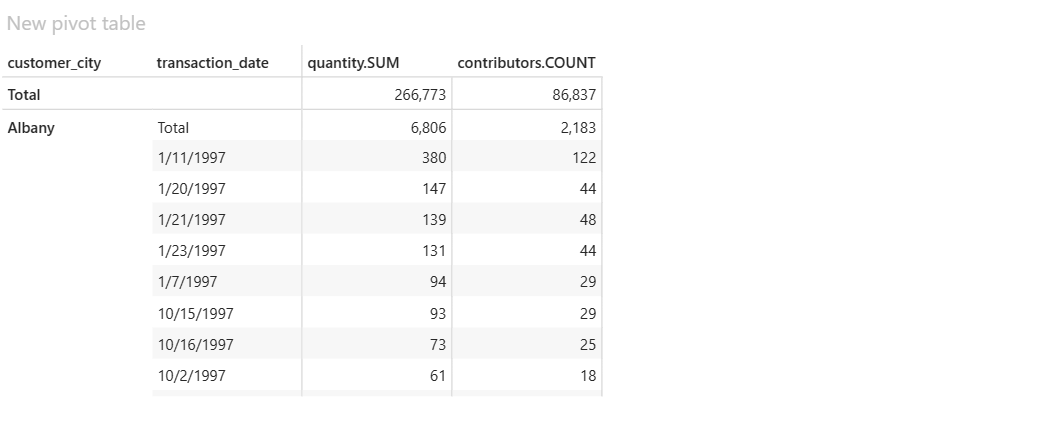

In [34]:
session.widget

In [35]:
transaction_table.load_csv("data/FoodMart/FoodMart-Transactions-1998.csv")

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
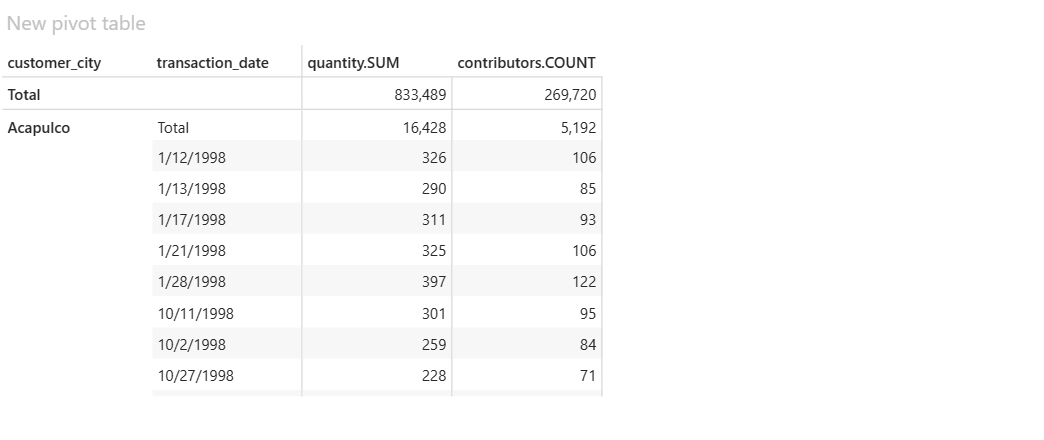

In [36]:
session.widget

In [37]:
customer_table.load_csv("data/FoodMart/Customer-Lookup - Copy.csv")

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
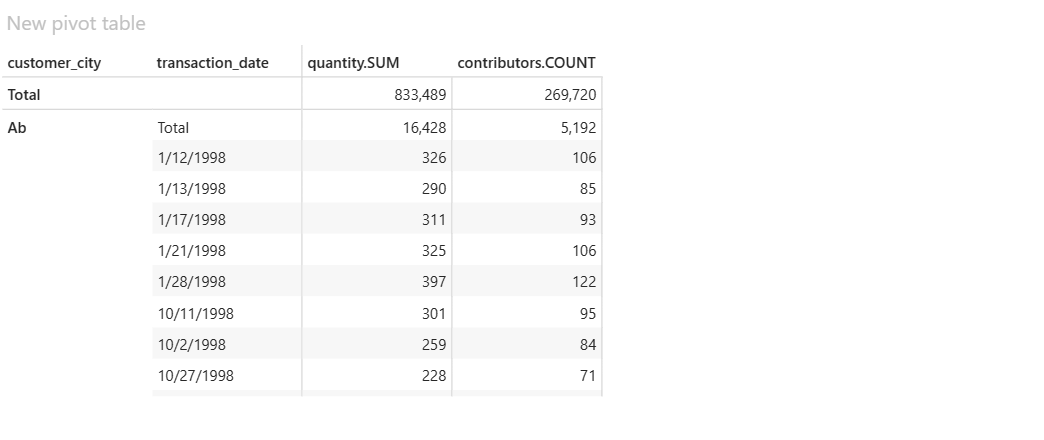

In [38]:
session.widget

In [39]:
l

In [40]:
m

{'contributors.COUNT': <atoti.measure.Measure object at 0x000001CDFF861D90>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x000001CDFFB5C640>, '__hidden_0_LEVEL': <atoti.measure.Measure object at 0x000001CDFFB5CBB0>, 'stock_date.isnull': <atoti.measure.Measure object at 0x000001CDFFB5C910>, 'customer_id.SUM': <atoti.measure.Measure object at 0x000001CDFFB5C850>, 'customer_id.MEAN': <atoti.measure.Measure object at 0x000001CDFFB5C190>, 'store_id.SUM': <atoti.measure.Measure object at 0x000001CDFFB5CC70>, 'store_id.MEAN': <atoti.measure.Measure object at 0x000001CDFFB5C8E0>, 'quantity.SUM': <atoti.measure.Measure object at 0x000001CDFFB5CE50>, 'quantity.MEAN': <atoti.measure.Measure object at 0x000001CDFFB0B1F0>, 'product_id.SUM': <atoti.measure.Measure object at 0x000001CDFFB0B280>, 'product_id.MEAN': <atoti.measure.Measure object at 0x000001CDFFB0B2B0>}

In [41]:
cube.query(
    m["contributors.COUNT"],
    m["quantity.SUM"],
    m["quantity.MEAN"],
    levels=[l["customer_city"],l["education"],l["product_brand"],l["yearly_income"],l["sales_region"],l["store_type"]],
    filter=(
        (l["product_brand"]=="Urban")	
        &(l["customer_city"] == "Ab")
        & (l["education"] == "High School Degree")
    ),
)

contributors.COUNT  \
customer_city education          product_brand yearly_income sales_region store_type                       
Ab            High School Degree Urban         $110K - $130K Mexico West  Supermarket                  2   
                                               $30K - $50K   Mexico West  Supermarket                  4   

                                                                                      quantity.SUM  \
customer_city education          product_brand yearly_income sales_region store_type                 
Ab            High School Degree Urban         $110K - $130K Mexico West  Supermarket            7   
                                               $30K - $50K   Mexico West  Supermarket           11   

                                                                                      quantity.MEAN  
customer_city education          product_brand yearly_income sales_region store_type                 
Ab            High School Degree Urban         $110K - $130K Mexico West  Supermarket          3.50  
                                               $30K - $50K   Mexico West  Supermarket          2.75